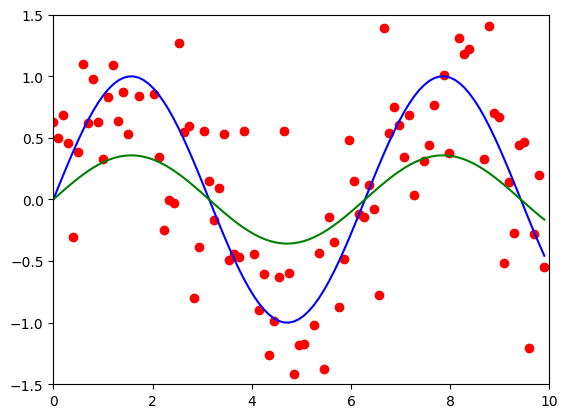

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

class KalmanFilter:
    def __init__(self, initial_state_mean, initial_state_covariance, process_covariance, measurement_covariance):
        self.state_mean = initial_state_mean
        self.state_covariance = initial_state_covariance
        self.process_covariance = process_covariance
        self.measurement_covariance = measurement_covariance

    def predict(self):
        # Prediction step
        self.state_mean = 0  # 一维状态的线性系统简化为 0
        self.state_covariance += self.process_covariance

    def update(self, measurement):
        # Update step
        kalman_gain = self.state_covariance / (self.state_covariance + self.measurement_covariance)
        self.state_mean += kalman_gain * (measurement - self.state_mean)
        self.state_covariance *= (1 - kalman_gain)

# 定义系统参数
initial_state_mean = 0  # 初始状态的均值
initial_state_covariance = 1  # 初始状态的协方差
process_variance = 0.1  # 系统过程噪声的方差
measurement_variance = 0.5  # 测量噪声的方差

# 创建 Kalman 滤波器对象
kf = KalmanFilter(initial_state_mean, initial_state_covariance, process_variance, measurement_variance)

# 生成模拟数据 - 简谐振动的位置
t = np.linspace(0, 10, 100)
true_positions = np.sin(t)  # 真实位置，这里简化为正弦波运动

# 创建动画
fig, ax = plt.subplots()
ax.set_xlim(0, 10)
ax.set_ylim(-1.5, 1.5)

true_line, = ax.plot([], [], label='True Position', color='blue')
measurements_scatter = ax.scatter([], [], label='Measurements', color='red')
filtered_line, = ax.plot([], [], label='Filtered Position', color='green')

def init():
    true_line.set_data([], [])
    measurements_scatter.set_offsets(np.empty((0, 2)))  # 空数组
    filtered_line.set_data([], [])
    return true_line, measurements_scatter, filtered_line

def update(frame):
    true_line.set_data(t[:frame], true_positions[:frame])
    measurements = np.column_stack((t[:frame], true_positions[:frame] + np.random.normal(loc=0, scale=0.5, size=frame)))
    measurements_scatter.set_offsets(measurements)
    
    filtered_positions = []
    for z in true_positions[:frame]:
        kf.predict()
        kf.update(z)
        filtered_positions.append(kf.state_mean)
    
    filtered_line.set_data(t[:frame], filtered_positions)
    return true_line, measurements_scatter, filtered_line

ani = FuncAnimation(fig, update, frames=len(t), init_func=init, blit=True)

# 将动画显示在Jupyter Notebook中
from IPython.display import HTML
HTML(ani.to_jshtml())
